In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import apriltag
import skimage as ski
from skimage.morphology import erosion, square, dilation, binary_dilation, binary_erosion, disk
import cv2

In [26]:
def show_image(image):
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.show()

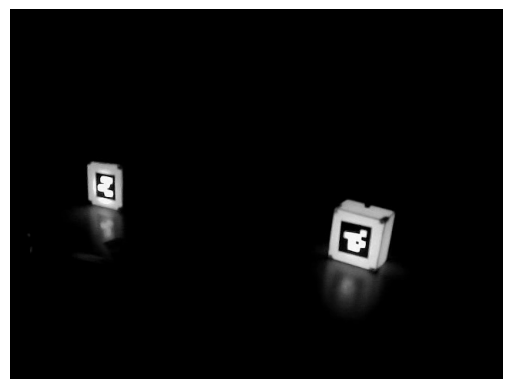

In [27]:
# load image

original_image = ski.io.imread('samples/frame2.png')
image = ski.color.rgb2gray(original_image)

show_image(image)

In [28]:
def count_detected_april_tags(image):
    options = apriltag.DetectorOptions(families="tag16h5")
    detector = apriltag.Detector(options)
    results = detector.detect(np.asarray(image * 255, np.uint8))
    return len(results)

def find_best_erosion_kernel(image, kernels):
    best_kernel = kernels[0]
    max_found_tags = 0
    for iter in range(len(kernels)):
        mod_image = erosion(image, kernels[iter])
        found_tags = count_detected_april_tags(mod_image)
        if found_tags > max_found_tags:
            best_kernel = kernels[iter]
            max_found_tags = found_tags
    return best_kernel

2


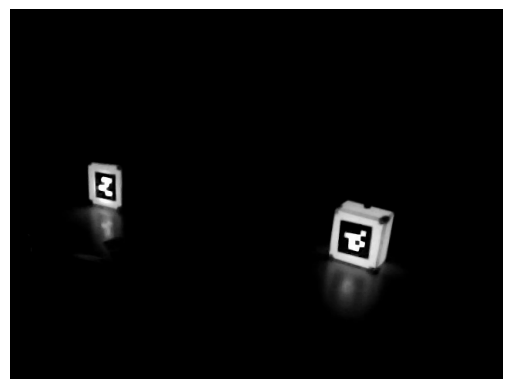

In [29]:
kernel = find_best_erosion_kernel(image, [square(1), square(3), square(5), square(7), disk(3), disk(5), disk(7)])
image = erosion(image, kernel)
found_tags = count_detected_april_tags(image)
print(found_tags)

show_image(image)

[INFO] tag: 1
[INFO] tag: 3


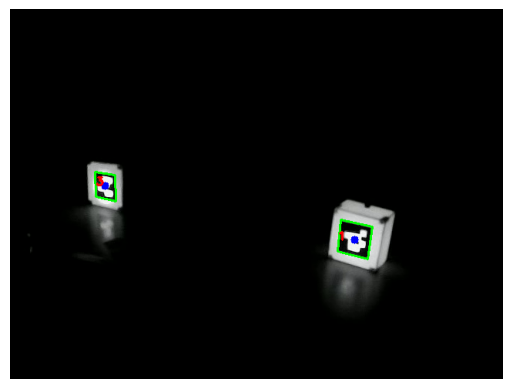

In [30]:
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)
results = detector.detect(np.asarray(image * 255, np.uint8))

# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(original_image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(original_image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(original_image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(original_image, ptD, ptA, (0, 255, 0), 2)
	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(original_image, (cX, cY), 5, (0, 0, 255), -1)
	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(original_image, str(r.tag_id), (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
	print("[INFO] tag: {}".format(r.tag_id))
show_image(original_image)